# Avnish Tripathi
# 2211014

In [18]:
print("Assignment1.ipynb")

Assignment1.ipynb


# Question 1

i)  Both Column vector's are Linearly indepenent.So, We can get all vectors of 2-d space from these two vectors. Hence, C(A) = 2

ii) Both Column Vectors are not are Linear Independent i.e We can obtain column_vector2 from column_vector1. So, C(B) = 1

iii) There are only two Linearly Independent Column vectors as we can obtain column_vector_2 from column_vector1 i.e one vector can be Expressed as a scaled version of another. so, C(D) = 2


# Question 2a

In [19]:
# importing the required module
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
c = 3*(10**8)  # speed of Light
ns = 10**-9  # 1ns = 10^-9s


In [20]:
user = (100,100,100) # (x,y,z) corrdinates system
s1 = (100,201,203)
s2 = (110,660,99)
s3 = (790,854,416)        # y-coordinates of all the satellites should be greater than that of device.
s4 = (919,595,130)     
s5 = (620,570,330)


In [21]:
# taking reference at the origin (0,0,0)
def distance_cal(user,satellite):
    dist = 0
    for i in range(3):
        dist += (user[i] - satellite[i]) ** 2
    dist = dist ** 0.5
    time = dist / c
    return dist , time #Returning Distance and time

In [22]:

r1 , t1 = distance_cal(user,s1)
r2 , t2 = distance_cal(user,s2) 
r3 , t3 = distance_cal(user,s3)    #Calculating Distance and Time
r4 , t4 = distance_cal(user,s4)
r5 , t5 = distance_cal(user,s5)

print("The distance between satellite1 and user is",r1,"m and the time taken by radio signal from satellite_1 to reach user is",t1,"s")
print("The distance between satellite2 and user is",r2,"m and the time taken by radio signal from satellite_2 to reach user is",t2,"s")
print("The distance between satellite3 and user is",r3,"m and the time taken by radio signal from satellite_3 to reach user is",t3,"s")
print("The distance between satellite4 and user is",r4,"m and the time taken by radio signal from satellite_4 to reach user is",t4,"s")
print("The distance between satellite5 and user is",r5,"m and the time taken by radio signal from satellite_5 to reach user is",t5,"s")


The distance between satellite1 and user is 144.25671561490648 m and the time taken by radio signal from satellite_1 to reach user is 4.808557187163549e-07 s
The distance between satellite2 and user is 560.0901713117273 m and the time taken by radio signal from satellite_2 to reach user is 1.8669672377057577e-06 s
The distance between satellite3 and user is 1069.7999813049166 m and the time taken by radio signal from satellite_3 to reach user is 3.5659999376830553e-06 s
The distance between satellite4 and user is 957.4372042071479 m and the time taken by radio signal from satellite_4 to reach user is 3.1914573473571597e-06 s
The distance between satellite5 and user is 737.6991256603196 m and the time taken by radio signal from satellite_5 to reach user is 2.4589970855343986e-06 s


# Question 2b -

In [23]:
# getting coordinates (x,y,z) from respective satellite tuples
x1 , x2 , x3 , x4 , x5 = s1[0] , s2[0] , s3[0] , s4[0] , s5[0]
y1 , y2 , y3 , y4 , y5 = s1[1] , s2[1] , s3[1] , s4[1] , s5[1]
z1 , z2 , z3 ,z4 , z5 = s1[2] , s2[2] , s3[2] , s4[2] , s5[2]

In [24]:

# using the Ax = B equations taught in the lecture to get the Coordinates of the user's device
A = [
    [2*(x2 - x1),2*(y2 - y1),2*(z2 - z1)],   
    [2*(x3 - x2),2*(y3 - y2),2*(z3 - z2)],         
    [2*(x4 - x3),2*(y4 - y3),2*(z4 - z3)],
    [2*(x5 - x4),2*(y5 - y4),2*(z5 - z4)]           # using all 5 satellites for user's coordinates_calculation
  ]
  
B = [
    [(r1**2 - r2**2) - (x1**2 - x2**2) - (y1**2 - y2**2) - (z1**2 - z2**2)],
    [(r2**2 - r3**2) - (x2**2 - x3**2) - (y2**2 - y3**2) - (z2**2 - z3**2)],
    [(r3**2 - r4**2) - (x3**2 - x4**2) - (y3**2 - y4**2) - (z3**2 - z4**2)],
    [(r4**2 - r5**2) - (x4**2 - x5**2) - (y4**2 - y5**2) - (z4**2 - z5**2)]
]

In [25]:
A = np.array(A)
B = np.array(B)
X = np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),np.matmul(A.transpose(),B))   #using this expression so that we dont have to worry about A being be non-sqaure matrix.

In [26]:
x , y , z = X[0] , X[1] , X[2]
print("The coordinates of the user calculated from the its distances to satellites and coordinates of satellites are-",x , y, z)

The coordinates of the user calculated from the its distances to satellites and coordinates of satellites are- [100.] [100.] [100.]


 # Question 2c-
 


In [27]:
Dt = random.uniform(10*ns,30*ns)            #generate delay between 10 to 30 ns because even small change in time can lead to large change in Location 
print("The random delay added is",Dt,"s")   #Because Radio Signals Travel with the speed of the Light.
# Recalculating distance due to change in time due to addition of random delay
r1 = (t1 + Dt) * c   
r2 = (t2 + Dt) * c
r3 = (t3 + Dt) * c  # Distance = Speed * time
r4 = (t4 + Dt) * c
r5 = (t5 + Dt) * c

The random delay added is 2.222836419770886e-08 s


In [28]:
# Computing A and B again now with the updated Distances due to Delay
A = [
    [2*(x2 - x1),2*(y2 - y1),2*(z2 - z1)],   
    [2*(x3 - x2),2*(y3 - y2),2*(z3 - z2)],         
    [2*(x4 - x3),2*(y4 - y3),2*(z4 - z3)],
    [2*(x5 - x4),2*(y5 - y4),2*(z5 - z4)]          
  ]
  
B = [
    [(r1**2 - r2**2) - (x1**2 - x2**2) - (y1**2 - y2**2) - (z1**2 - z2**2)],
    [(r2**2 - r3**2) - (x2**2 - x3**2) - (y2**2 - y3**2) - (z2**2 - z3**2)],
    [(r3**2 - r4**2) - (x3**2 - x4**2) - (y3**2 - y4**2) - (z3**2 - z4**2)],
    [(r4**2 - r5**2) - (x4**2 - x5**2) - (y4**2 - y5**2) - (z4**2 - z5**2)]
]


In [29]:
A = np.array(A)
B = np.array(B)
X = np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),np.matmul(A.transpose(),B))  #using this expression so that we dont have to worry about A being be non-sqaure matrix.

In [30]:
x , y , z= X[0] , X[1] , X[2]
print("User Coordinates Calculated after addition of Delay-")
print(x , y , z)

User Coordinates Calculated after addition of Delay-
[96.21639401] [94.24068269] [100.91187898]


Only by adding delay of nanoseconds we can see Very much change in the Location coordinates.


In [31]:
# Location Inaccuracy = Absolute differnce between user's locaction and  Wrong Predicted location because of Random error that we added.
d_inaccuracy ,t = distance_cal(user,X)
print("The location inaccuracy is",float(d_inaccuracy),"m")

The location inaccuracy is 6.951038299260048 m


# Question 2d)- 
EXPLANATION-
Initally I have taken delay and dist lists to store the timing delay and the localization error then i have calculated the average localization error and average delay because to handle the randomness of the random function that i am using to introduce delays (Code inside the second for loop). Then, we are storing the average delay and average localization error in x and y list respectively for plotting the graph. 

In [32]:
y = []  # Location_Inaccuracy List
x = []  # Delay List
for i in range(1,11):
    for j in range(5):    # for taking average of delays between defined time delays.
        delay = list() 
        dist = list()
        Dt = random.uniform(i*10*ns,(i+1)*10*ns)
        r1 = (t1 + Dt) * c
        r2 = (t2 + Dt) * c           
        r3 = (t3 + Dt) * c      #Introducing Delays
        r4 = (t4 + Dt) * c
        r5 = (t5 + Dt) * c
        A = [
            [2*(x2 - x1),2*(y2 - y1),2*(z2 - z1)],   
            [2*(x3 - x2),2*(y3 - y2),2*(z3 - z2)],         
            [2*(x4 - x3),2*(y4 - y3),2*(z4 - z3)],
            [2*(x5 - x4),2*(y5 - y4),2*(z5 - z4)]          
            ]
    
        B = [
            [(r1**2 - r2**2) - (x1**2 - x2**2) - (y1**2 - y2**2) - (z1**2 - z2**2)],
            [(r2**2 - r3**2) - (x2**2 - x3**2) - (y2**2 - y3**2) - (z2**2 - z3**2)],
            [(r3**2 - r4**2) - (x3**2 - x4**2) - (y3**2 - y4**2) - (z3**2 - z4**2)],
            [(r4**2 - r5**2) - (x4**2 - x5**2) - (y4**2 - y5**2) - (z4**2 - z5**2)]
            ]
            
        A = np.array(A)
        B = np.array(B)
        X = np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),np.matmul(A.transpose(),B))
        d_inaccuracy , t = distance_cal(user,X)

        delay.append(Dt)
        dist.append(float(d_inaccuracy))  #Calculating Location_inaccuracy

    y.append(sum(dist)/len(dist))   # Appending average of Localization Error
    x.append(sum(delay)/len(delay))

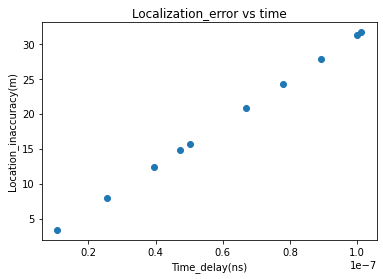

In [33]:
# plotting the points  
plt.scatter(x,y) 
    
# naming the x axis 
plt.xlabel('Time_delay(ns)') 
# naming the y axis 
plt.ylabel('Location_inaccuracy(m)') 
    
# giving a title to my graph 
plt.title('Localization_error vs time') 
    
# function to show the plot 
plt.show() 

Average Localization Error's

In [34]:
for i in range(len(x)):
    print("The average location error for time delay (",i+1,"to",i+2,") ns is",y[i],"m")


The average location error for time delay ( 1 to 2 ) ns is 3.3535046594283653 m
The average location error for time delay ( 2 to 3 ) ns is 7.973416096638832 m
The average location error for time delay ( 3 to 4 ) ns is 12.336761230895778 m
The average location error for time delay ( 4 to 5 ) ns is 14.771025372111191 m
The average location error for time delay ( 5 to 6 ) ns is 15.67685707314217 m
The average location error for time delay ( 6 to 7 ) ns is 20.890324279713 m
The average location error for time delay ( 7 to 8 ) ns is 24.311726695970936 m
The average location error for time delay ( 8 to 9 ) ns is 27.894251965272467 m
The average location error for time delay ( 9 to 10 ) ns is 31.237681953492288 m
The average location error for time delay ( 10 to 11 ) ns is 31.650116631468894 m
